# Model 1

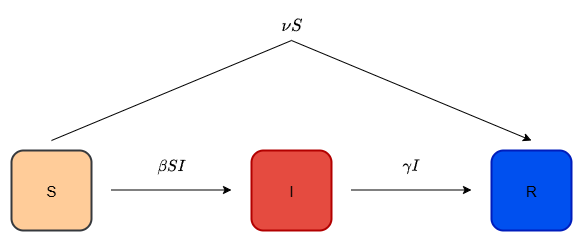

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta S I - \nu S \\
\frac{dI}{dt} &= \beta S I - \gamma I \\
\frac{dR}{dt} &= \gamma I + \nu S
\end{aligned}
$$

Here, $\nu$ is the **vaccination rate**, proportion of population getting vaccinated per unit time, assumed to be a constant for simplicity.


In [3]:
# Model 1 Definition
def sir_vacc_model1(y, t, pars):
    S = y[0]
    I = y[1]
    
    dSdt = -pars['beta'] * S * I - pars['v'] * S
    dIdt = pars['beta'] * S * I - pars['gamma'] * I
    dRdt = pars['gamma'] * I + pars['v'] * S
    dydt = [dSdt, dIdt, dRdt]
    return dydt

# Model 1 - Variant

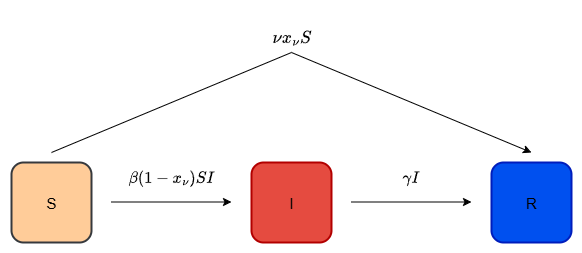

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta (1-x_\nu) S I - \nu x_\nu S \\
\frac{dI}{dt} &= \beta (1-x_\nu) S I - \gamma I \\
\frac{dR}{dt} &= \gamma I + \nu x_\nu S
\end{aligned}
$$

Here, $x_\nu$ is the **proportion of population ready to get vaccinated**, indicating preparedness(?) OR accessibility(?) of the vaccination, assumed to be a constant for simplicity.

In [6]:
# Model 1 Variant Definition
def sir_vacc_model1_var(y, t, pars):
    S = y[0]
    I = y[1]
    
    dSdt = -pars['beta'] * (1-pars['x_v']) * S * I - pars['v'] * pars['x_v'] * S
    dIdt = pars['beta'] * (1-pars['x_v']) * S * I - pars['gamma'] * I
    dRdt = pars['gamma'] * I + pars['v'] * pars['x_v'] * S
    dydt = [dSdt, dIdt, dRdt]
    return dydt

# Model 2

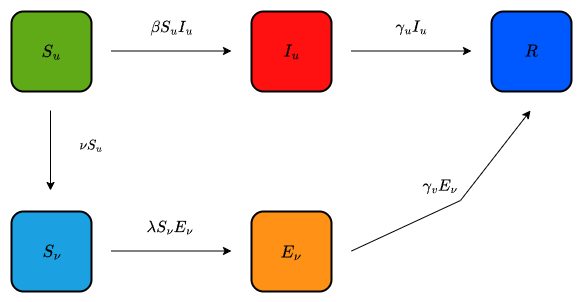

$$
\begin{aligned}
\frac{dS_u}{dt} &= -\beta S_u I_u - \nu S_u \\
\frac{dS_v}{dt} &= -\lambda S_v E_v + \nu S_u \\
\frac{dI_u}{dt} &= \beta S_u I_u - \gamma_u I_u \\
\frac{dE_v}{dt} &= \lambda S_v E_v - \gamma_v E_v \\
\frac{dR}{dt} &= \gamma_u I_u +  \gamma_v E_v
\end{aligned}
$$

Here, $\lambda$ is the **expose rate**, proportion of population exposed to the disease, assumed to be a constant for simplicity.

Initially:
$$
\begin{aligned}
S_u(0) &= (1-x_\nu) S \\
S_v(0) &= x_\nu S \\
I_u(0) &>= 1 person\\
E_v(0) &>= 1 person
\end{aligned}
$$

Here, $x_\nu$ is the **vaccinated proportion at t = 0**, assumed to be a constant for simplicity.


In [9]:
# Model 2 Definition
def sir_vacc_model2(y, t, pars):
    S_u = y[0]
    S_v = y[1]
    I_u = y[2]
    E_v = y[3]
    
    beta = pars['beta']
    nu = pars['v']
    lam = pars['lambda']
    gamma_u = pars['gamma_u']
    gamma_v = pars['gamma_v']

    dS_u = -beta * S_u * I_u - nu * S_u
    dS_v = -lam * S_v * E_v + nu * S_u
    dI_u = beta * S_u * I_u - gamma_u * I_u
    dE_v = lam * S_v * E_v - gamma_v * E_v
    dR = gamma_u * I_u + gamma_v * E_v

    dydt = [dS_u, dS_v, dI_u, dE_v, dR]
    return dydt

# Plotting Function Definitions for all models above

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# For Interactive Features
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets

# Base SIR Model Definition
def sir_model(y, t, pars):
    S = y[0]
    I = y[1]
    
    dSdt = -pars['beta'] * S * I
    dIdt = pars['beta'] * S * I - pars['gamma'] * I
    dRdt = pars['gamma'] * I
    dydt = [dSdt, dIdt, dRdt]
    return dydt

In [12]:
def plot_base(beta, gamma, N=1000, I0=10, tf=100):
    pars={}
    pars['beta'] = beta # Transmission rate 
    pars['gamma'] = gamma # Recovery rate (1/days)
    pars['basR0'] = pars['beta'] / pars['gamma']
    pars['N'] = N
    pars['I0'] = I0
    pars['S0'] = pars['N'] - pars['I0']
    
    t = np.arange(0, tf)
    y = integrate.odeint(sir_model, np.array([pars['S0'], pars['I0'], 0]) / pars['N'], t, args = (pars,))

    plt.plot(t, y[:, 0], label='Susceptible_DT', color='r')
    plt.plot(t, y[:, 1], label='Infectious_DT', color='g')
    plt.plot(t, y[:, 2], label='Recovered_DT', color='b')

    I_peak = np.max(y[:, 1])
    t_peak = t[np.argmax(y[:, 1])]
    plt.plot(t_peak, I_peak, 'ro')
    plt.text(t_peak + 1, I_peak, f'Peak\nDay {t_peak}\n{I_peak:.2%}', color='red')
    
    plt.xlabel( 'Time (days) ')
    plt.ylabel('Population proportion')
    plt.legend()
    plt.show()

In [13]:
def plot_vacc1(beta, gamma, v, N=1000, I0=10, tf=100):
    pars={}
    pars['beta'] = beta # Transmission rate 
    pars['gamma'] = gamma # Recovery rate (1/days)
    pars['v'] = v
    pars['N'] = N
    pars['I0'] = I0
    pars['S0'] = pars['N'] - pars['I0']
    
    t = np.arange(0, tf)
    y = integrate.odeint(sir_vacc_model1, np.array([pars['S0'], pars['I0'], 0]) / pars['N'], t, args = (pars,))

    plt.plot(t, y[:, 0], label='Susceptible_DT', color='r')
    plt.plot(t, y[:, 1], label='Infectious_DT', color='g')
    plt.plot(t, y[:, 2], label='Recovered_DT', color='b')

    I_peak = np.max(y[:, 1])
    t_peak = t[np.argmax(y[:, 1])]
    plt.plot(t_peak, I_peak, 'ro')
    plt.text(t_peak + 1, I_peak, f'Peak\nDay {t_peak}\n{I_peak:.2%}', color='red')
    
    plt.xlabel( 'Time (days) ')
    plt.ylabel('Population proportion')
    plt.legend()
    plt.show()

In [14]:
def plot_vacc1_1(beta, gamma, v, x_v, N=1000, I0=10, tf=100):
    pars={}
    pars['beta'] = beta # Transmission rate 
    pars['gamma'] = gamma # Recovery rate (1/days)
    pars['v'] = v
    pars['x_v'] = x_v
    pars['N'] = N
    pars['I0'] = I0
    pars['S0'] = pars['N'] - pars['I0']
    
    t = np.arange(0, tf)
    y = integrate.odeint(sir_vacc_model1_var, np.array([pars['S0'], pars['I0'], 0]) / pars['N'], t, args = (pars,))

    plt.plot(t, y[:, 0], label='Susceptible_DT', color='r')
    plt.plot(t, y[:, 1], label='Infectious_DT', color='g')
    plt.plot(t, y[:, 2], label='Recovered_DT', color='b')

    I_peak = np.max(y[:, 1])
    t_peak = t[np.argmax(y[:, 1])]
    plt.plot(t_peak, I_peak, 'ro')
    plt.text(t_peak + 1, I_peak, f'Peak\nDay {t_peak}\n{I_peak:.2%}', color='red')
    
    plt.xlabel( 'Time (days) ')
    plt.ylabel('Population proportion')
    plt.legend()
    plt.show()

In [15]:
def plot_vacc2(beta, lmbd, gamma_u, gamma_v, v, x_v, N=1000, I0=10, E0=10, tf=100):
    pars={}
    pars['beta'] = beta # Transmission rate 
    pars['gamma_u'] = gamma_u 
    pars['gamma_v'] = gamma_v 
    pars['v'] = v
    pars['lambda'] = lmbd
    pars['x_v'] = x_v
    pars['N'] = N
    pars['I0'] = I0
    pars['E0'] = E0
    pars['S0'] = pars['N'] - pars['I0'] - pars['E0']
    pars['Su_0'] = pars['S0'] * (1-pars['x_v'])
    pars['Sv_0'] = pars['S0'] = pars['Su_0']
    
    t = np.arange(0, tf)
    y = integrate.odeint(sir_vacc_model2, np.array([pars['Su_0'], pars['Sv_0'], pars['I0'], pars['E0'], 0]) / pars['N'], t, args = (pars,))

    plt.plot(t, y[:, 0], label='Susceptible_Unvacc', color='b')
    plt.plot(t, y[:, 1], label='Susceptible_Vacc', color='g')
    plt.plot(t, y[:, 2], label='Infectious', color='r')
    plt.plot(t, y[:, 3], label='Exposed', color='orange')
    plt.plot(t, y[:, 4], label='Recovered', color='gold')

    I_peak = np.max(y[:, 2])
    t_peak = t[np.argmax(y[:, 2])]
    plt.plot(t_peak, I_peak, 'ro')
    plt.text(t_peak + 1, I_peak, f'Peak\nDay {t_peak}\n{I_peak:.2%}', color='red')
    
    plt.xlabel( 'Time (days) ')
    plt.ylabel('Population proportion')
    plt.legend()
    plt.show()

In [16]:
interact(plot_base,
         beta=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='beta'),
         gamma=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='gamma'))

interactive(children=(FloatSlider(value=1.0, description='beta', max=10.0, min=0.1), FloatSlider(value=1.0, de…

<function __main__.plot_base(beta, gamma, N=1000, I0=10, tf=100)>

In [17]:
interact(plot_vacc1,
         beta=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='beta'),
         gamma=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='gamma'),
         v=FloatSlider(min=0.01, max=1, step=0.01, value=0.05, description='vaccination rate'))

interactive(children=(FloatSlider(value=1.0, description='beta', max=10.0, min=0.1), FloatSlider(value=1.0, de…

<function __main__.plot_vacc1(beta, gamma, v, N=1000, I0=10, tf=100)>

In [18]:
interact(plot_vacc1_1,
         beta=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='beta'),
         gamma=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='gamma'),
         v=FloatSlider(min=0.01, max=1, step=0.01, value=0.05, description='vaccination rate'),
         x_v=FloatSlider(min=0.01, max=1, step=0.01, value=0.7, description='vaccination accessible population proportion'))

interactive(children=(FloatSlider(value=1.0, description='beta', max=10.0, min=0.1), FloatSlider(value=1.0, de…

<function __main__.plot_vacc1_1(beta, gamma, v, x_v, N=1000, I0=10, tf=100)>

In [19]:
interact(plot_vacc2,
         beta=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='beta'),
         lmbd=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='expose rate'),
         gamma_u=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='gamma_u'),
         gamma_v=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='gamma_v'),
         v=FloatSlider(min=0.01, max=1, step=0.01, value=0.05, description='vaccination rate'),
         x_v=FloatSlider(min=0.01, max=1, step=0.01, value=0.7, description='initial vaccinated proportion'))

interactive(children=(FloatSlider(value=1.0, description='beta', max=10.0, min=0.1), FloatSlider(value=1.0, de…

<function __main__.plot_vacc2(beta, lmbd, gamma_u, gamma_v, v, x_v, N=1000, I0=10, E0=10, tf=100)>